# 02. Neural network classification with pytorch

Classification is a problem of predicitng wether something is one thing or another

## 1. Make Classifification data and get it ready

In [8]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# make circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [9]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [10]:
# Make Dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1" : X[:, 0],
                       "X2" : X[:, 1],
                       "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


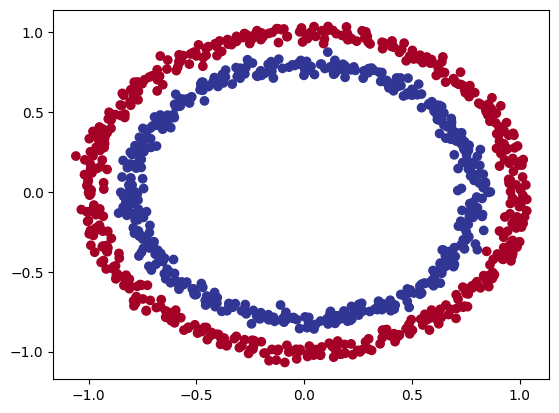

In [11]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
             y=X[:,1],
             c = y,
             cmap=plt.cm.RdYlBu)

**Note** : The data that we are working with is often referred to a toy dataset.
a data set that is small enough to expriment on, but still sizeable enough to practice the fundamentals

### 1.1 Check input and output shapes

In [12]:
X.shape, y.shape

((1000, 2), (1000,))

In [13]:
# View the first example of features and lables
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [14]:
# Turn data into tensors
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,# it means that 20% of data will be test and 80% will be train
                                                    random_state = 42)

In [16]:
len(X_train), len(X_test),len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a Model

Lets build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will runn on a (GPU)
2. Construct a model (nn.Module)
3. Define a loss function and optimizer
4. Create a training and test Loop

In [17]:
import torch
from torch import nn

# 1. Make device agonistic code
device =  "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Now we've setup device agonistic code, lets create a model that:
1. Subclasses **nn.Modlule**
2. Create 2 **nn.Linear()** layers that are capable of handling the shapes of our data
3. Defines a **forward()** method that outlines the forward pass of the model
4. instatiate an instance of our model class and send it to the target **device**

In [18]:
# 2. Construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 3. Create 2 nn.Linear layers Capable of Handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales 5 numbers
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features and outputs a single feature
  #4. define a forward method that outlines a forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
# 5. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
next(model_0.parameters())

Parameter containing:
tensor([[-0.3582,  0.4832],
        [ 0.4418,  0.6584],
        [ 0.3041, -0.1682],
        [ 0.5782, -0.3681],
        [ 0.5460, -0.6630]], requires_grad=True)

In [20]:
# Lets replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0
# We can also use this Sequential Method inside our model

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
 # Make some predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"length of predicitons {len(untrained_preds)}, Shape {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

length of predicitons 200, Shape torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-0.0859],
        [-0.0998],
        [-0.0540],
        [-0.0949],
        [-0.0615],
        [-0.0699],
        [-0.1034],
        [-0.0964],
        [-0.0537],
        [-0.1009]])

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss Function and optimizer

 We've setup a loss (also called a criterion or cost function) and optimizer before in notebook 01.

But different problem types require different loss functions.

For example, for a regression problem (predicting a number) you might used mean absolute error (MAE) loss.

And for a binary classification problem (like ours), you'll often use binary cross entropy as the loss function.

However, the same optimizer function can often be used across different problem spaces.

For example, the stochastic gradient descent optimizer (SGD, torch.optim.SGD()) can be used for a range of problems, and the same applies to the Adam optimizer (torch.optim.Adam()).

* For the loss function were going to use 'torch.nn.BCEWithlogitsLoss()' *

In [22]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [23]:
# Calculate Accuracy - out of 100  examples what precentage does our model get right ?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) *100
  return acc

# 3. Train a Model:
 To train our model we are going to need to build a training model:

 1. Forward Pass
 2. Calculate the loss
 3. Optimizer Zero Grad
 4. Loss Backward (BackPropagation)
 5. Optimizer Step (Gradient Descent)


## 3.1 Going from raw logits ->  Prediction probabilities -> Prediction Labels

Our model outputs are going to be raw **Logits**.

We can convert these **Logits** into **predictions probabilities** by passing them to some kind of activiation function (e.g. sigmoid for binary crossentropy and softmax for multiclass classification)

Then we can convert our models predicitons probability to **Predicition Labels** by either rounding them or taking the 'argmax()'

In [24]:
# View the first 5 Outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0859],
        [-0.0998],
        [-0.0540],
        [-0.0949],
        [-0.0615]])

In [25]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [26]:
# Use the sigmoid activation function on our model logits and turn them into Predicition Probabilities

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4785],
        [0.4751],
        [0.4865],
        [0.4763],
        [0.4846]])

For our prediction probability values, we need to perform a range-style rounding on them:
* y_pred_probs if >= 0.5 => y=1
* y_pred_probs if < 0.5 => y=0

In [27]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

# 3.2 Building a Training and testing loops

In [28]:
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to Target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward Pass
  y_logits = model_0(X_train).squeeze()
  y_logits.to(device)
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss/Accuracy
  loss = loss_fn(y_logits,  # The BCEWithLogitsLoss Expects Raw-logits as inputs
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_preds)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss Backwards
  loss.backward()

  # 5. Optimizer Step
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate The loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  # Print out whats happening
  if epoch % 100 == 0:
      print(f"Epoch : {epoch} | Loss: {loss:.5f} , Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch : 0 | Loss: 0.69406 , Acc: 50.00% | Test Loss: 0.69310, Test Acc: 50.00%
Epoch : 100 | Loss: 0.69312 , Acc: 50.00% | Test Loss: 0.69331, Test Acc: 50.00%
Epoch : 200 | Loss: 0.69301 , Acc: 50.88% | Test Loss: 0.69399, Test Acc: 45.50%
Epoch : 300 | Loss: 0.69299 , Acc: 51.25% | Test Loss: 0.69434, Test Acc: 46.00%
Epoch : 400 | Loss: 0.69298 , Acc: 51.38% | Test Loss: 0.69451, Test Acc: 46.00%
Epoch : 500 | Loss: 0.69298 , Acc: 51.38% | Test Loss: 0.69460, Test Acc: 45.50%
Epoch : 600 | Loss: 0.69298 , Acc: 51.12% | Test Loss: 0.69464, Test Acc: 45.50%
Epoch : 700 | Loss: 0.69298 , Acc: 51.00% | Test Loss: 0.69466, Test Acc: 45.50%
Epoch : 800 | Loss: 0.69298 , Acc: 51.00% | Test Loss: 0.69467, Test Acc: 46.00%
Epoch : 900 | Loss: 0.69298 , Acc: 51.00% | Test Loss: 0.69467, Test Acc: 46.00%


## 4. Make Predicitons and evaulate the model

from the metrics it looks like our model isnt learning anything

so to inspect it lets make some predictions and make them visual!

To do so we are going to import 'plot_decision_boundary()'

In [29]:
import requests
from pathlib import Path

# Download helper funtions from Learn Pytorch Repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [30]:
from helper_functions import plot_predictions, plot_decision_boundary

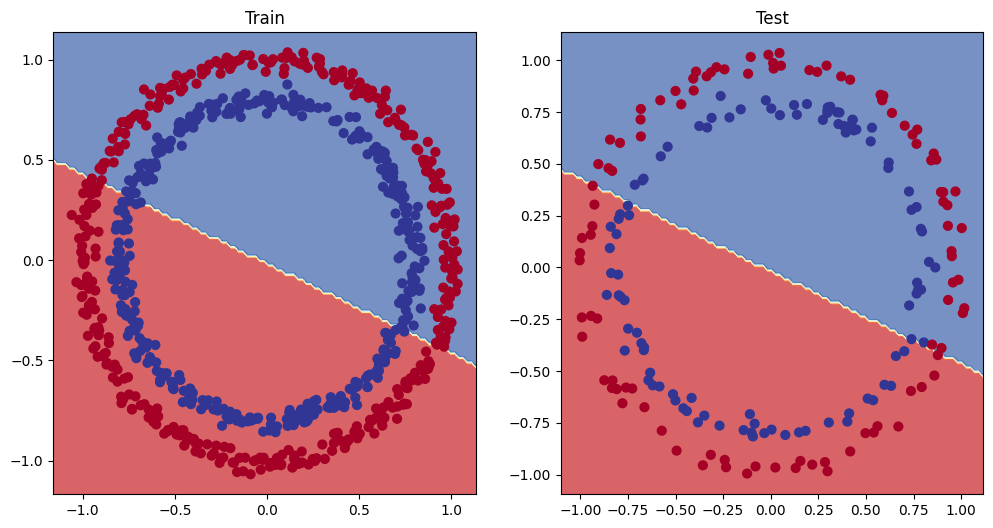

In [31]:
# Plot decision boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model prespective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer - number of epochs
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from model's prespective because they deal directly with the model and not the data.

and because these options are all values we can change, they are referred to **hypermarameters**.

Lets try improving our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [32]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10 , out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [33]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()
# Create an optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                             lr = 0.1)
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put dataa on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward Pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss/Accuracy
  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true = y_train,
                    y_pred=y_pred)

  # 3. Optimizer Zero grad
  optimizer.zero_grad()

  # 4. Loss Backward
  loss.backward()

  # 5. Optimizer step (Gradient Descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate the loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  # Print out whats happening
  if epoch % 100 == 0 :
    print(f"Epoch : {epoch} | Loss: {loss:.5f} , Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch : 0 | Loss: 0.69482 , Acc: 50.62% | Test Loss: 0.70111, Test Acc: 46.50%
Epoch : 100 | Loss: 0.69308 , Acc: 50.75% | Test Loss: 0.69550, Test Acc: 47.00%
Epoch : 200 | Loss: 0.69300 , Acc: 50.88% | Test Loss: 0.69481, Test Acc: 47.50%
Epoch : 300 | Loss: 0.69299 , Acc: 51.00% | Test Loss: 0.69469, Test Acc: 47.50%
Epoch : 400 | Loss: 0.69298 , Acc: 50.88% | Test Loss: 0.69468, Test Acc: 46.50%
Epoch : 500 | Loss: 0.69298 , Acc: 51.38% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch : 600 | Loss: 0.69298 , Acc: 51.62% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch : 700 | Loss: 0.69298 , Acc: 51.50% | Test Loss: 0.69468, Test Acc: 45.00%
Epoch : 800 | Loss: 0.69298 , Acc: 51.38% | Test Loss: 0.69468, Test Acc: 45.00%
Epoch : 900 | Loss: 0.69298 , Acc: 51.25% | Test Loss: 0.69468, Test Acc: 45.50%


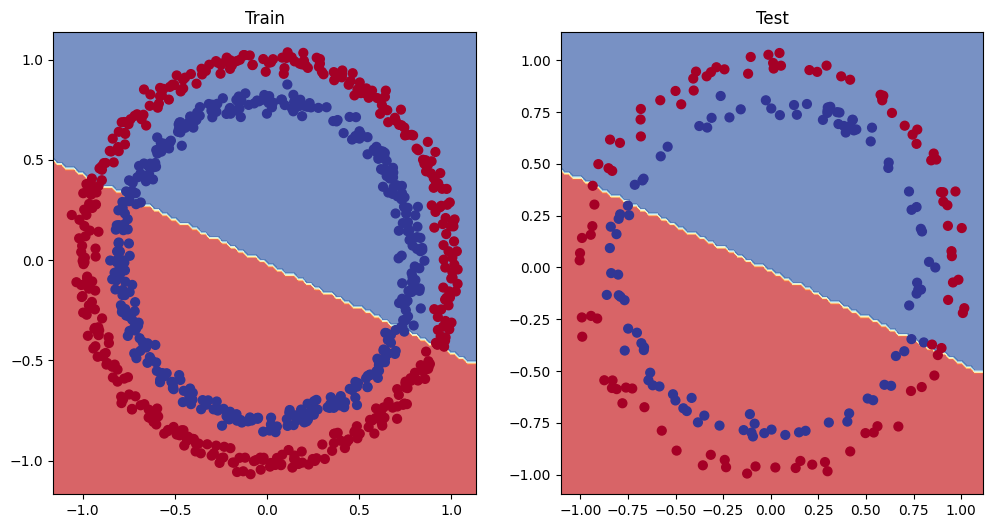

In [34]:
# Plot the decision boundary
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot a larger problem is to test out a smaller problem

In [35]:
# Create some data (Same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [36]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


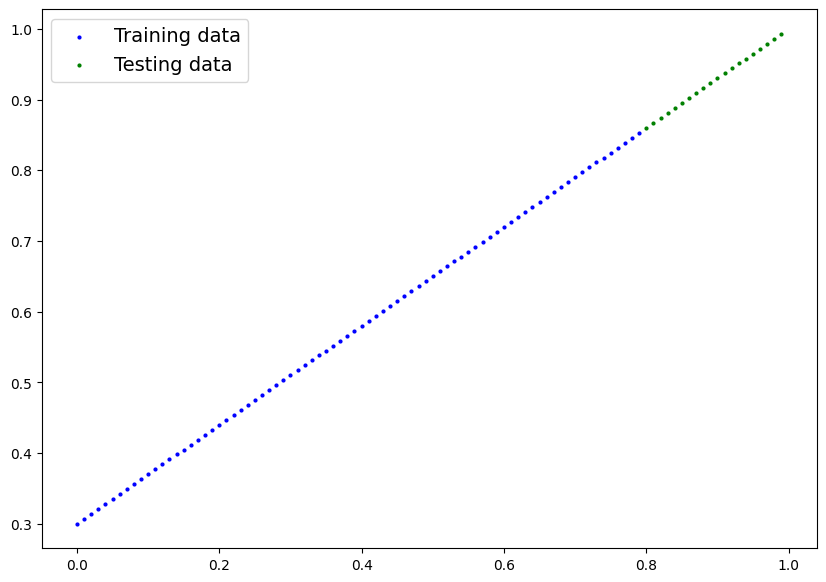

In [37]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

### 5.2 Adjusting model_1 to fit a straight line

In [38]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [39]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [40]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.91103
Epoch: 100 | Train loss: 0.02858, Test loss: 0.00081
Epoch: 200 | Train loss: 0.02533, Test loss: 0.00209
Epoch: 300 | Train loss: 0.02137, Test loss: 0.00305
Epoch: 400 | Train loss: 0.01964, Test loss: 0.00341
Epoch: 500 | Train loss: 0.01940, Test loss: 0.00387
Epoch: 600 | Train loss: 0.01903, Test loss: 0.00379
Epoch: 700 | Train loss: 0.01878, Test loss: 0.00381
Epoch: 800 | Train loss: 0.01840, Test loss: 0.00329
Epoch: 900 | Train loss: 0.01798, Test loss: 0.00360


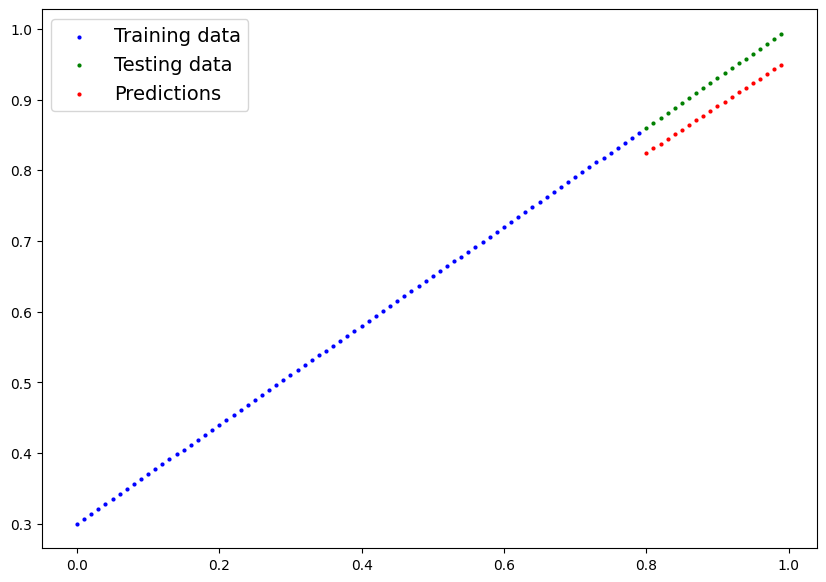

In [41]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

## 6. The missing piece of our model : non-Linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines ?"

or in machine learning term an infinite amounts of linear and none linear functions

### 6.1 Recreating non-Linear data

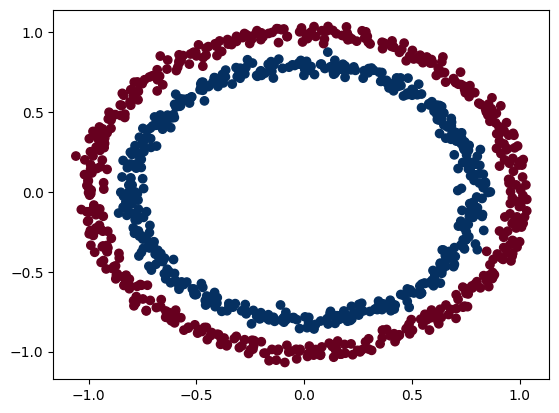

In [42]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdBu)

In [43]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turnn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test,  y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size = 0.2,
                                                     random_state = 42)
X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

### 6.2 Building a model with non-Linearity

* Linear = Straight lines
* Non-Linear = Non-straight lines

In [44]:
# Build a model with non-linear activations functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()



  def forward(self, x):
    # Where should we put our non-linear activation functions?   self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    return self.layer_3(self.relu(self.relu(self.relu(self.layer_2(self.relu(self.relu(self.layer_1(x))))))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [45]:
with torch.inference_mode():
  untrained_y_preds = model_3(X_test.to(device))

untrained_y_preds[:5], y_test[:5]

(tensor([[0.0167],
         [0.0207],
         [0.0126],
         [0.0171],
         [0.0420]]),
 tensor([1., 0., 1., 0., 1.]))

In [46]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_3.parameters(),
                            lr = 0.1)

In [47]:
def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [48]:
epochs = 10000
torch.cuda.manual_seed(42)
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)


for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)

  acc = accuracy(y_true = y_train,
                 y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():

    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        test_pred)
    test_acc = accuracy(y_true = y_test,
                        y_pred = test_pred)
  if epoch % 1000 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.68248, Test acc: 50.00%
Epoch: 1000 | Loss: 0.56818, Accuracy: 87.75% | Test loss: 0.55532, Test acc: 86.50%
Epoch: 2000 | Loss: 0.04176, Accuracy: 99.88% | Test loss: 0.06583, Test acc: 100.00%
Epoch: 3000 | Loss: 0.01672, Accuracy: 99.88% | Test loss: 0.03363, Test acc: 100.00%
Epoch: 4000 | Loss: 0.01048, Accuracy: 100.00% | Test loss: 0.02446, Test acc: 99.50%
Epoch: 5000 | Loss: 0.00765, Accuracy: 100.00% | Test loss: 0.01986, Test acc: 99.50%
Epoch: 6000 | Loss: 0.00603, Accuracy: 100.00% | Test loss: 0.01712, Test acc: 99.50%
Epoch: 7000 | Loss: 0.00499, Accuracy: 100.00% | Test loss: 0.01538, Test acc: 99.50%
Epoch: 8000 | Loss: 0.00428, Accuracy: 100.00% | Test loss: 0.01428, Test acc: 99.50%
Epoch: 9000 | Loss: 0.00375, Accuracy: 100.00% | Test loss: 0.01347, Test acc: 99.50%


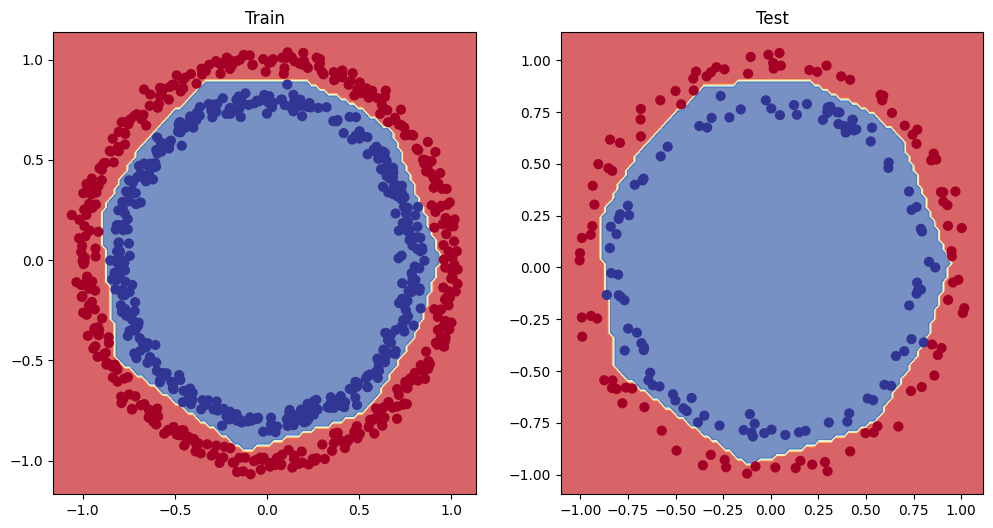

In [49]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

 ## 7. Replicating non-Linear activation functions

 Neural networks, rather than us telling the model what to learn, we give it the tools to dicover patterns in data and it tries to figure out the patterns on its own.

 And these tools are linear and non-Linear functions.

In [50]:
# Create a tensor

A = torch.arange(-10, 10, 1, dtype = torch.float32)

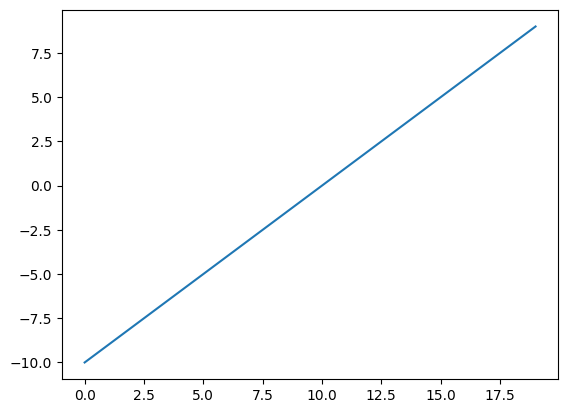

In [51]:
# Visualize the tensor
plt.plot(A);

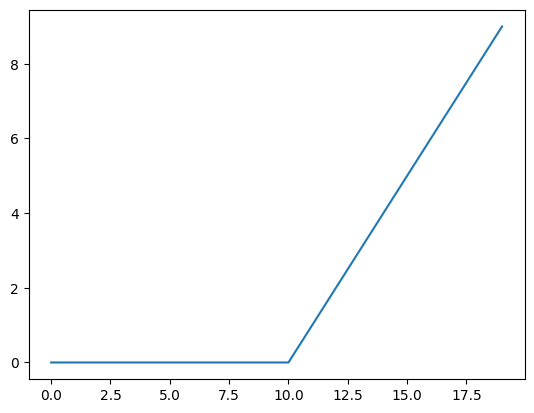

In [52]:
plt.plot(torch.relu(A));

In [53]:
def relu(x: torch.tensor) -> torch.tensor:
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors


relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

In [54]:
# Now lets do the same for sigmoid

def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

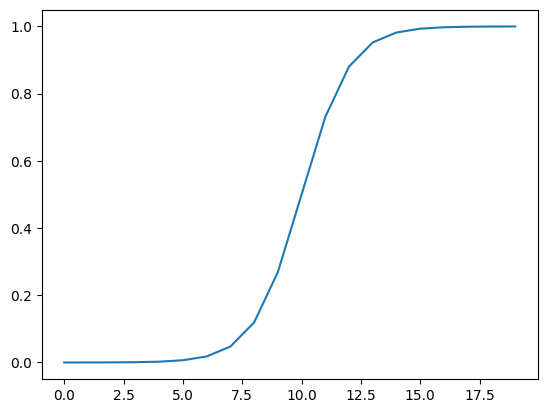

In [55]:
plt.plot(torch.sigmoid(A));

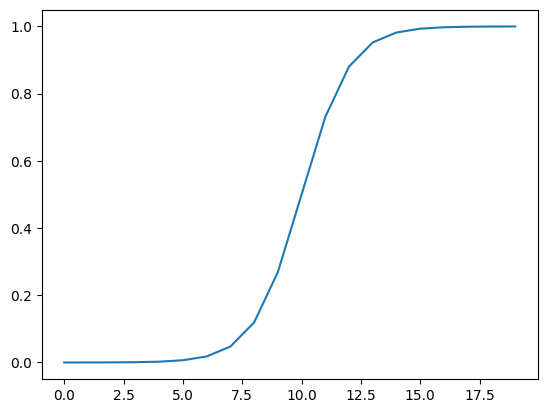

In [56]:
plt.plot(sigmoid(A));

## 8. Putting it all together with a multi-class classification

* Binary Classification = one thing or another (cat vs dog, spam vs not-spam)
* Multi-class classification = more than thing or another (cat vs dog vs chicken)

### 8.1 Creating a toy multi-class dataset

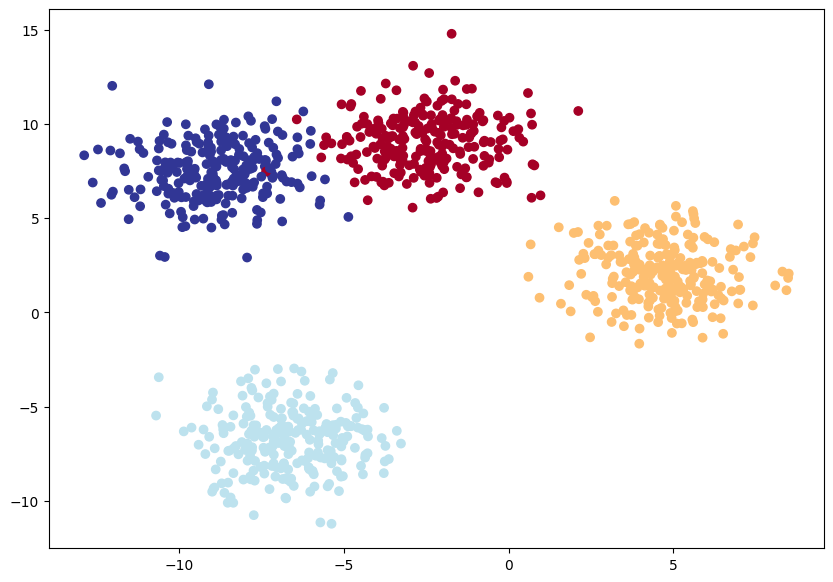

In [57]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # Read about this
from sklearn.model_selection import train_test_split

# Set the data parameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5, # give the clusters a little shake up
                            random_state = RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)

# 4. plot data
plt.figure(figsize = (10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob, cmap = plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model in PyTorch


In [58]:
# Create device agnostic code
device = 'cuda' if  torch.cuda.is_available() else 'cpu'
device

'cpu'

In [59]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    # The """ thing is called python docstrings. read about it.
    """Initilizes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model.
      output_features (int): Number of outputs features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default is 8.

    Returns:

    Examples:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )

  def forward(self, x):
      return self.linear_layer_stack(x)

# Create an instance of Blobmodel and send it to the target device
model_4 = BlobModel(input_features = 2,
                    output_features = 4,
                    hidden_units = 8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and an optimizer for a multi-class classificaation model

In [60]:
# Create a loss function for multi-class classification - Measures how wrong our predicitons are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class Classification - Updates our model parameters to try to reduce the lost
optimizer = torch.optim.SGD(params = model_4.parameters(),
                            lr = 0.1)

### 8.4 Getting Predicition probabilities for a Multi-Class PyTorch model

In order to evaluate and train and test our model , we need to convert our model's outputs (logits) to prediction probabilities and then to prediciton labels.

Logits(Raw output of the model) -> Pred pribs(use "torch.softmax") -> Pred labels(Take the argmax of the prediciton probabilities)

In [61]:
# Lets get some raw outputs of our model (logits)

model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:5]


tensor([[-0.4603,  0.1242, -0.1447,  0.2262],
        [-0.3816,  0.7560,  1.3547,  1.3346],
        [-0.4090,  0.1508, -0.2864, -0.2967],
        [-0.3858, -0.0221, -0.1996,  0.0551],
        [-0.3900,  0.3935,  0.9896,  1.2713]])

In [62]:
# Convert our model's Logits outputs to prediciton probabilities
# We use torch.sigmoid() for Binary-Cross-Entropy but in a Multi-class classification we use torch.softmax()
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.4603,  0.1242, -0.1447,  0.2262],
        [-0.3816,  0.7560,  1.3547,  1.3346],
        [-0.4090,  0.1508, -0.2864, -0.2967],
        [-0.3858, -0.0221, -0.1996,  0.0551],
        [-0.3900,  0.3935,  0.9896,  1.2713]])
tensor([[0.1626, 0.2916, 0.2229, 0.3230],
        [0.0651, 0.2031, 0.3696, 0.3622],
        [0.2000, 0.3501, 0.2261, 0.2238],
        [0.1924, 0.2768, 0.2318, 0.2990],
        [0.0805, 0.1761, 0.3197, 0.4237]])


In [63]:
torch.sum(y_pred_probs[0]), torch.argmax(y_pred_probs[0])

(tensor(1.), tensor(3))

In [64]:
# Convert our model's predicition probabilities to predicition labels

y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:5], y_blob_test[:5]

(tensor([3, 2, 1, 3, 3]), tensor([1, 3, 2, 1, 0]))

### 8.5 Create a training loop and testing loop for multi-class PyTorch Model.

In [65]:
# Fit the multi-class model to the data
torch.cuda.manual_seed(42)


# Set number of epochs
epochs = 1000

# Put data into target device
X_blob_train , X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train , y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### Training
  model_4.train()

  # Forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # Calculate the loss
  loss = loss_fn(y_logits,
                 y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,
                    y_pred = y_pred)


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  ### Testing
  model_4.eval()
  with torch.inference_mode():
    y_test_logits = model_4(X_blob_test)
    y_test_pred = torch.softmax(y_test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(y_test_logits,
                        y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test,
                           y_pred = y_test_pred)
  if epoch % 100 == 0:
    print(f"Epoch : {epoch} | Loss: {loss:.5f} , Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch : 0 | Loss: 1.58554 , Acc: 5.25% | Test Loss: 1.29624, Test Acc: 29.00%
Epoch : 100 | Loss: 0.03886 , Acc: 99.12% | Test Loss: 0.02985, Test Acc: 99.50%
Epoch : 200 | Loss: 0.02821 , Acc: 99.12% | Test Loss: 0.01807, Test Acc: 99.50%
Epoch : 300 | Loss: 0.02617 , Acc: 99.25% | Test Loss: 0.01540, Test Acc: 99.50%
Epoch : 400 | Loss: 0.02527 , Acc: 99.25% | Test Loss: 0.01419, Test Acc: 99.50%
Epoch : 500 | Loss: 0.02471 , Acc: 99.25% | Test Loss: 0.01345, Test Acc: 99.50%
Epoch : 600 | Loss: 0.02427 , Acc: 99.38% | Test Loss: 0.01293, Test Acc: 99.50%
Epoch : 700 | Loss: 0.02391 , Acc: 99.38% | Test Loss: 0.01252, Test Acc: 99.50%
Epoch : 800 | Loss: 0.02359 , Acc: 99.38% | Test Loss: 0.01217, Test Acc: 99.50%
Epoch : 900 | Loss: 0.02330 , Acc: 99.38% | Test Loss: 0.01186, Test Acc: 99.50%


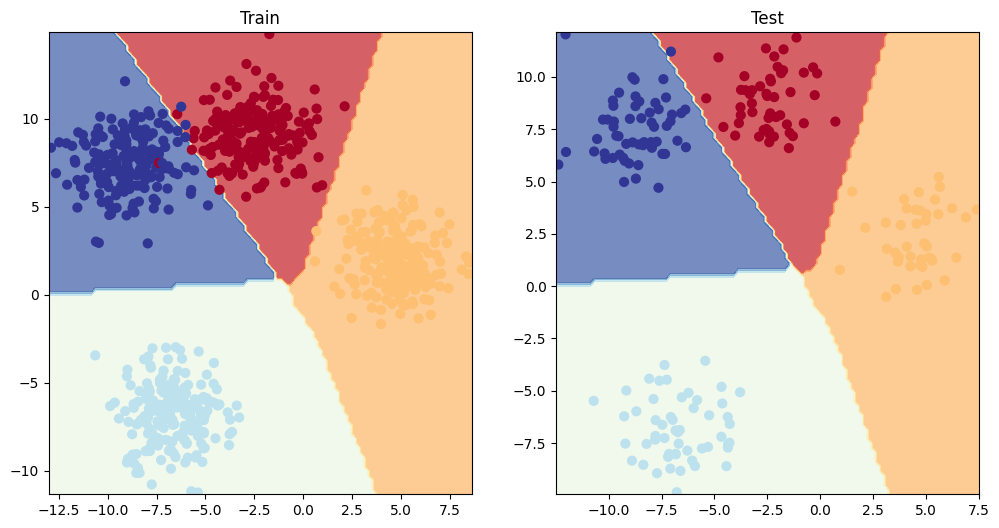

In [66]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [67]:
### 8.6 making and evaluating predictions with a PyTorch multi-class model
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

In [68]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.5733e-06, 1.0000e+00, 2.0759e-07, 1.3252e-06],
        [3.7515e-04, 4.1978e-08, 4.0778e-06, 9.9962e-01],
        [1.9948e-08, 1.2499e-05, 9.9998e-01, 8.3451e-06],
        [5.6122e-05, 9.9983e-01, 4.4349e-05, 7.2911e-05],
        [9.9987e-01, 9.3932e-06, 4.9900e-07, 1.2445e-04],
        [3.2907e-05, 1.1423e-09, 4.7168e-07, 9.9997e-01],
        [6.5870e-07, 1.0038e-04, 9.9987e-01, 2.5551e-05],
        [9.9977e-01, 6.2238e-08, 6.5350e-07, 2.2525e-04],
        [1.5956e-11, 4.9285e-07, 1.0000e+00, 3.6241e-06],
        [9.9992e-01, 1.5430e-07, 4.6100e-07, 8.4238e-05]])

In [69]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
print(torch.eq(y_preds, y_blob_test))

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

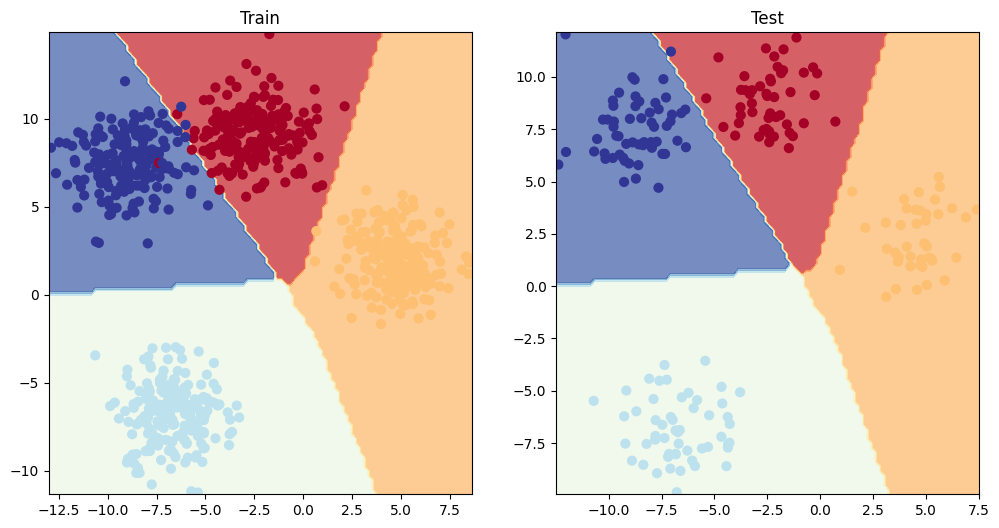

In [70]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test);

## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples , how many does our model get right ?
* Precission
* Recall
* F1-score
* Confusion matrix
* Classification report


In [71]:
!pip install torchmetrics

In [74]:
from torchmetrics import Accuracy

# Setup metric

torchmetric_accuracy = Accuracy(task='multiclass', num_classes = 4)

# Calculate accuracy

torchmetric_accuracy(y_test_pred, y_blob_test)

tensor(0.9950)